In [1]:
import experiment
import sys
sys.path.append("../../modules/")
from helper import *
# ---
import lasagne
from lasagne.layers import *
import theano
from theano import tensor as T
# ---
from matplotlib import pyplot as plt
%matplotlib inline

cudnn not detected


In [13]:
model_name = "exp1.model"
args = dict()
# because we used cudnn on cuda, we have to use conv2d/maxpool2d here, 
# which means changing those classes' flip_filter behaviours
args["dont_flip_filters"] = True
args["input_shape"] = (None, 1, 60, 60)
args["max_epochs"] = 100
args["alpha"] = 0.01
args["seed"] = 0
args["batch_size"] = 128
args["out_model"] = model_name
args["out_stats"] = "exp1"
net = experiment.get_net(args)
net.load_params_from(model_name)
#net.initialize()
print net

Loaded parameters to layer 'dense6' (shape 320x20).
Loaded parameters to layer 'dense6' (shape 20).
Loaded parameters to layer 'dense7' (shape 20x6).
Loaded parameters to layer 'dense7' (shape 6).
Loaded parameters to layer 'dense16' (shape 64x10).
Loaded parameters to layer 'dense16' (shape 10).
NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x107a4e490>,
     batch_iterator_train=<helper.ShufflingBatchIterator object at 0x109232b50>,
     custom_scores=None,
     layers=[<lasagne.layers.dense.DenseLayer object at 0x11b04a550>],
     loss=None, max_epochs=100, more_params={},
     objective=<function objective at 0x107a50c08>,
     objective_loss_function=<function categorical_crossentropy at 0x1077b2de8>,
     on_batch_finished=[],
     on_epoch_finished=[<function after_epoch at 0x11b7ae1b8>, <function after_epoch at 0x11b5edde8>, <nolearn.lasagne.handlers.PrintLog instance at 0x11b7a17a0>],
     on_training_finished=[],
     on_

In [14]:
layers = net.get_all_layers()
l_trans = None
for layer in layers:
    if isinstance(layer, TransformerLayer):
        l_trans = layer

X = T.tensor4('x')
get_trans_out = theano.function([X], lasagne.layers.get_output(l_trans, X))

In [15]:
layers[2].flip_filters

False

In [8]:
#train_set, _, _ = load_mnist("../../data/mnist.pkl.gz")
#Xt, _ = train_set
train_set = load_cluttered_mnist_train_only("../../data/mnist_cluttered_60x60_6distortions.npz")
Xt, _ = train_set

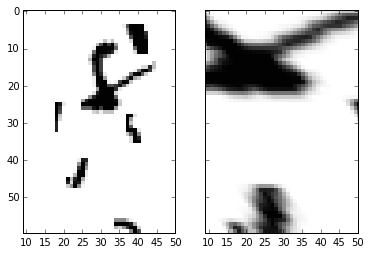

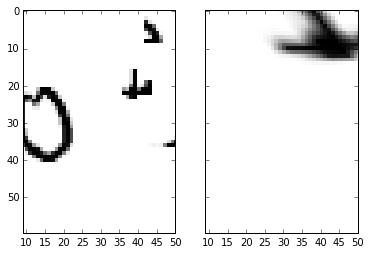

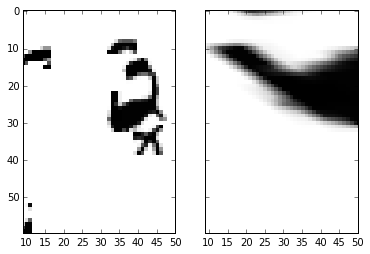

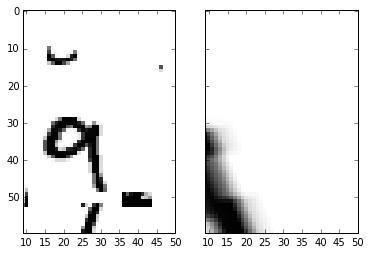

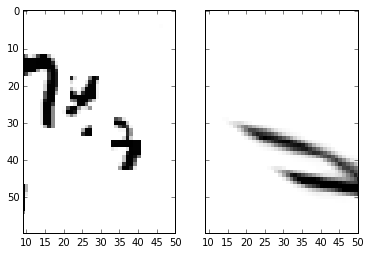

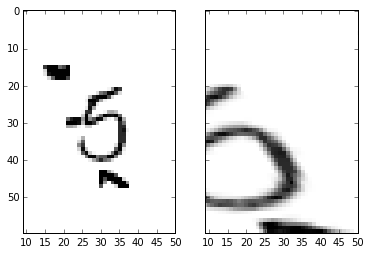

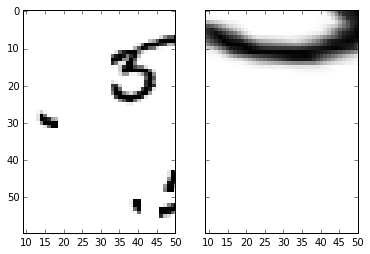

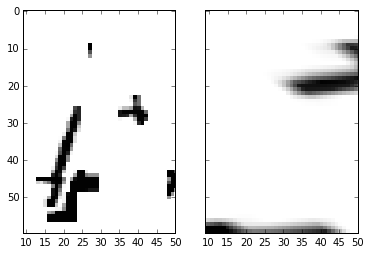

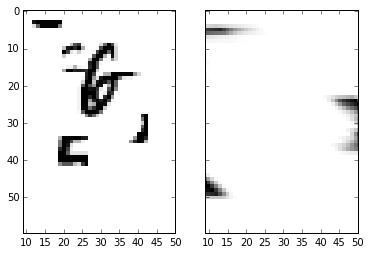

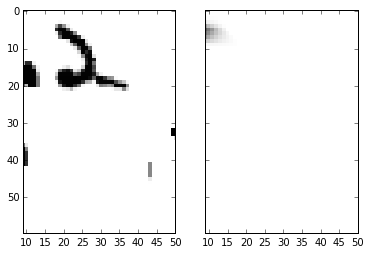

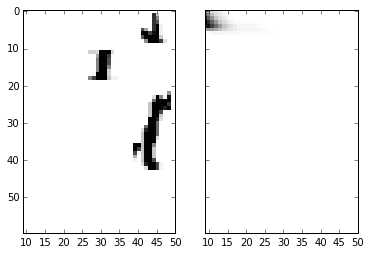

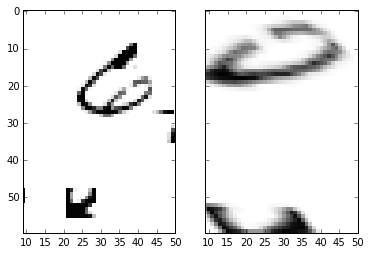

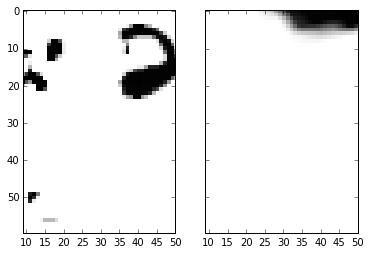

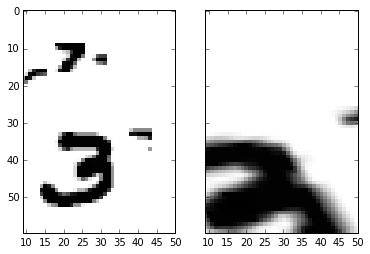

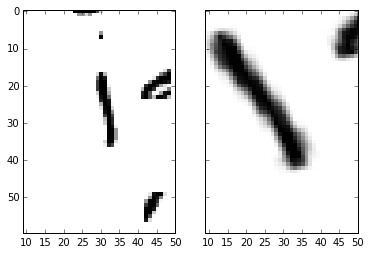

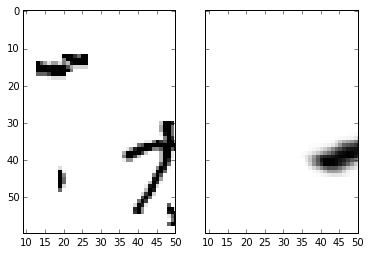

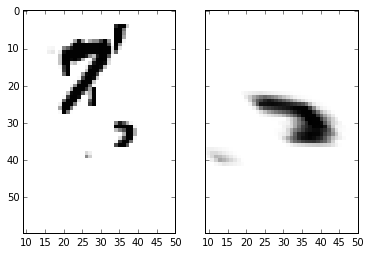

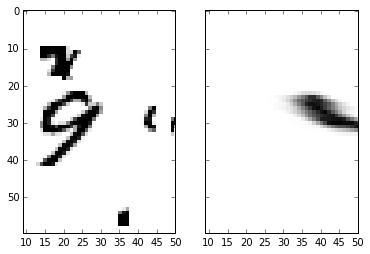

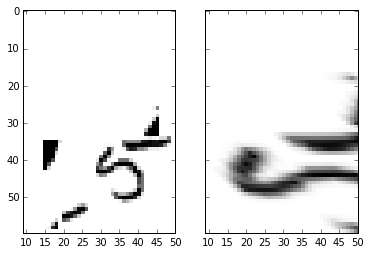

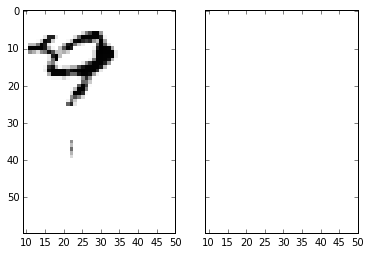

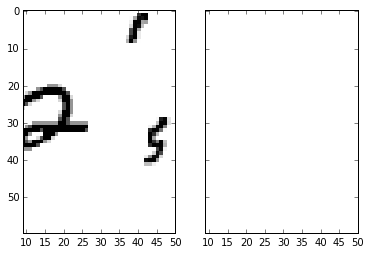

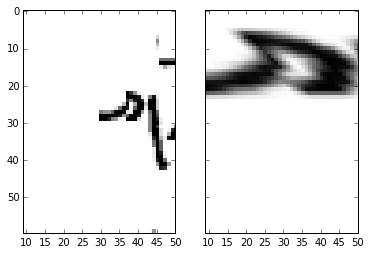

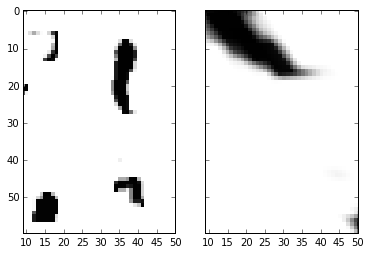

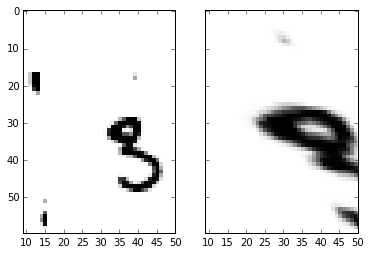

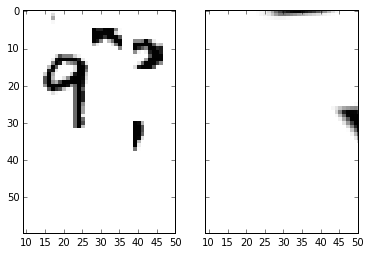

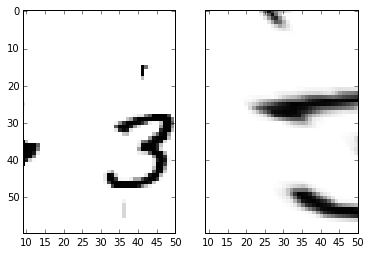

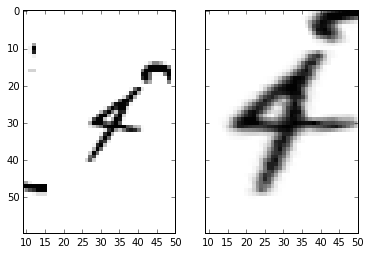

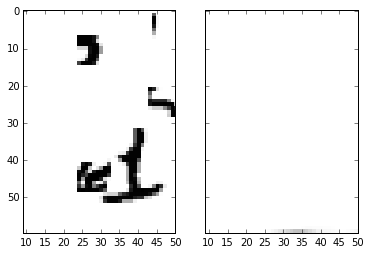

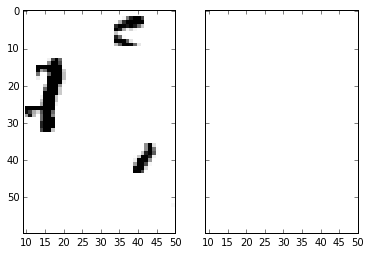

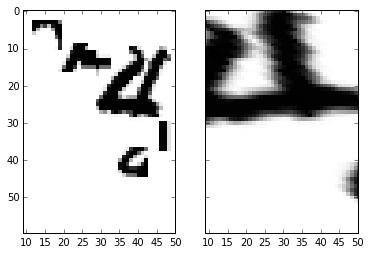

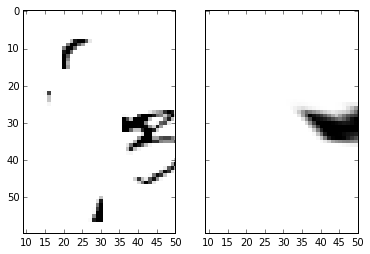

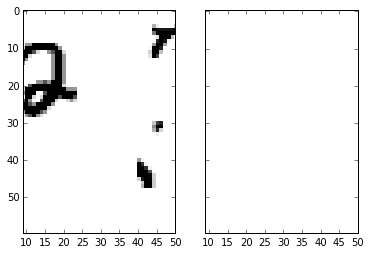

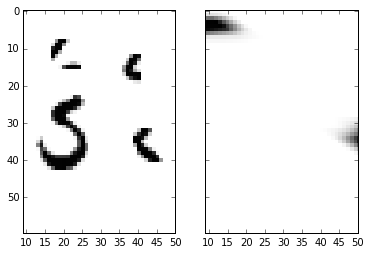

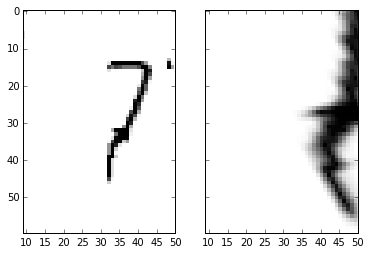

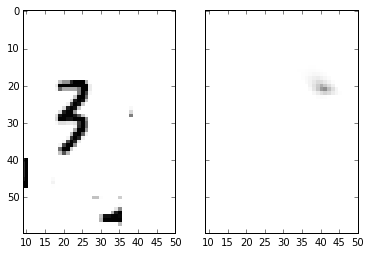

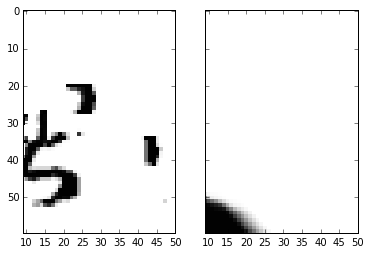

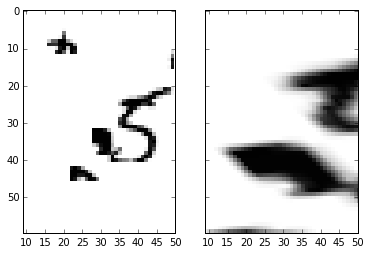

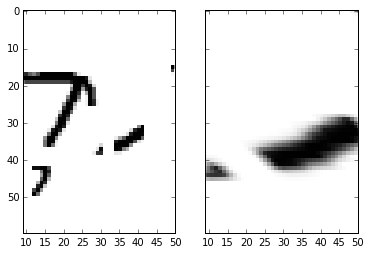

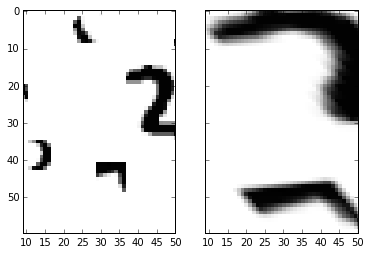

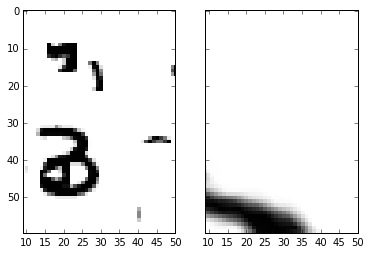

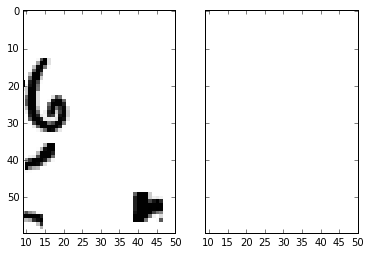

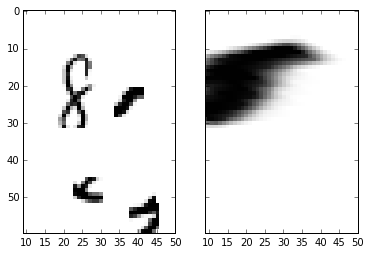

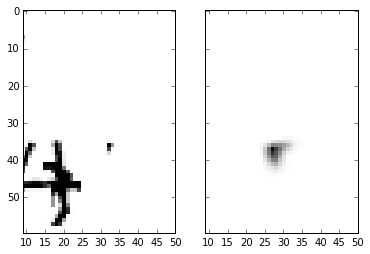

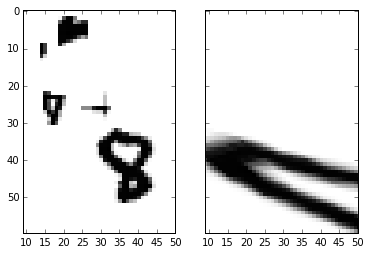

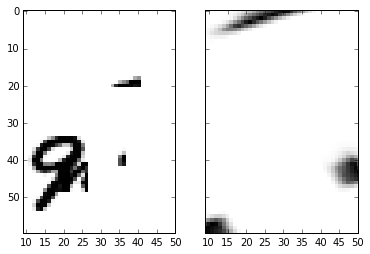

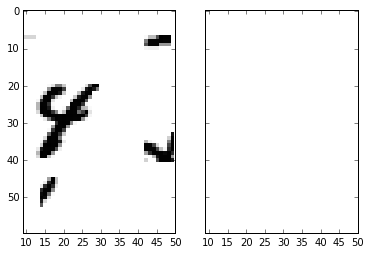

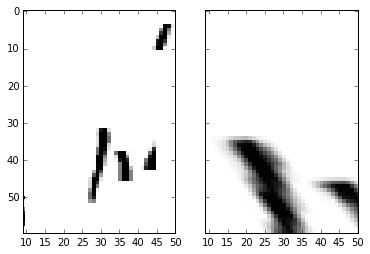

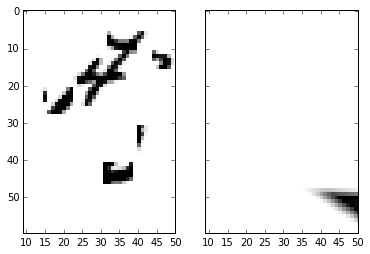

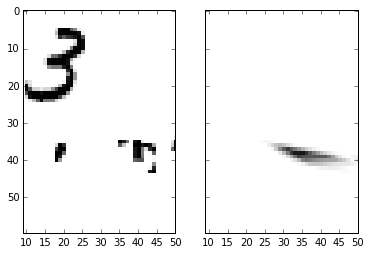

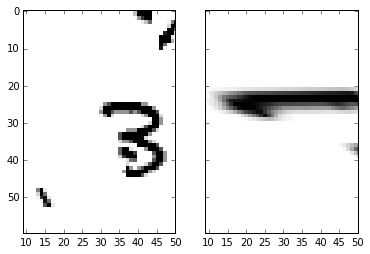

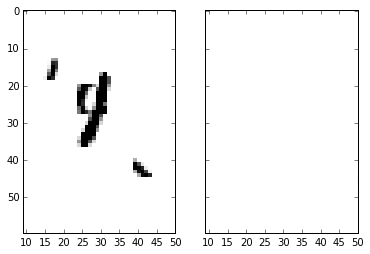

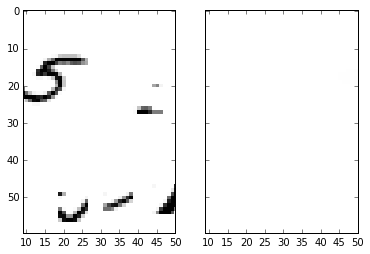

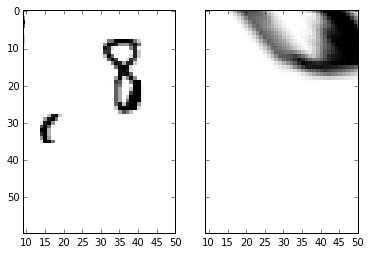

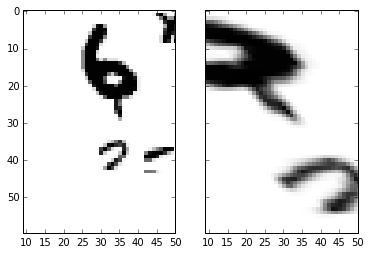

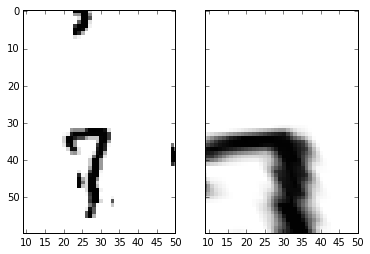

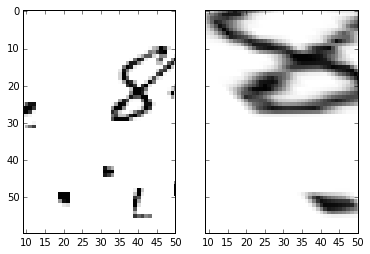

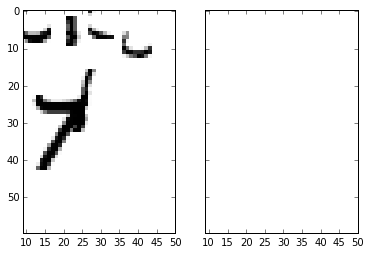

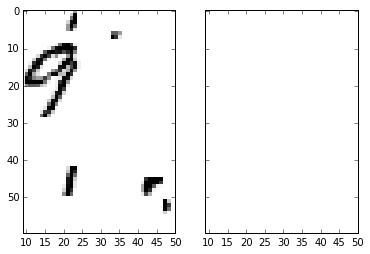

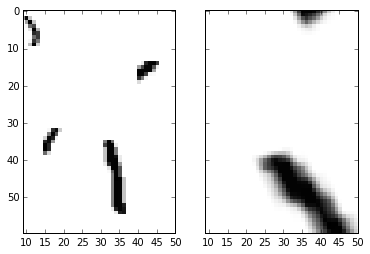

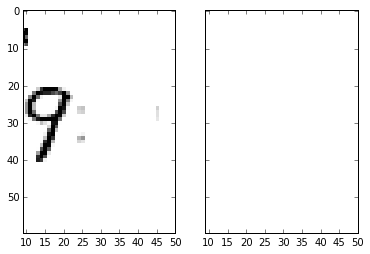

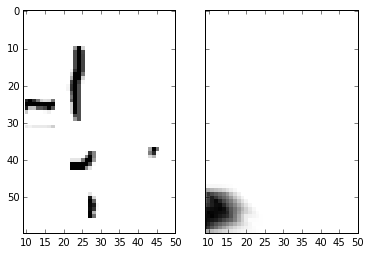

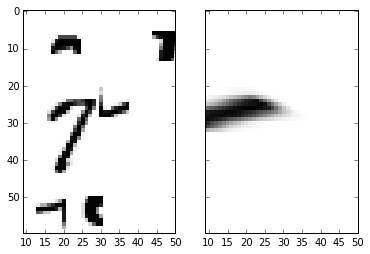

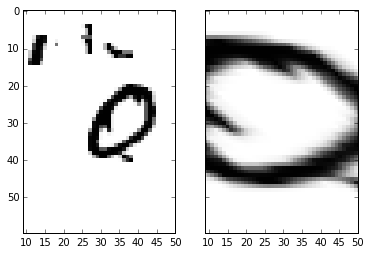

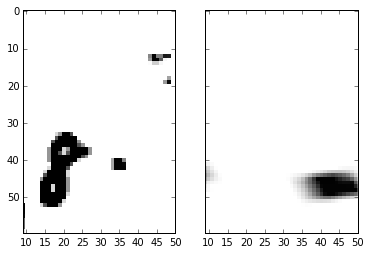

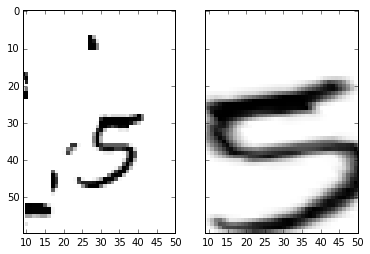

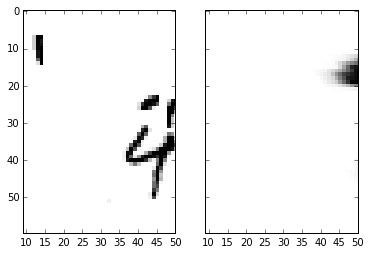

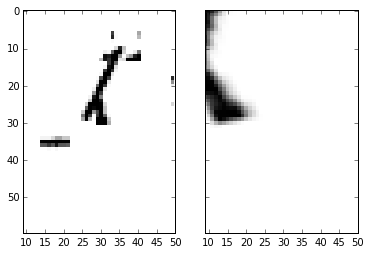

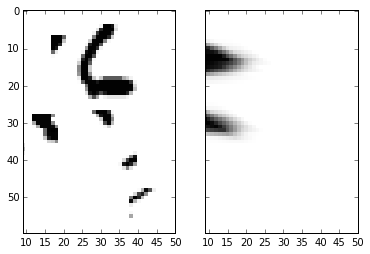

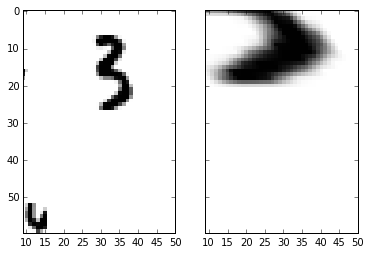

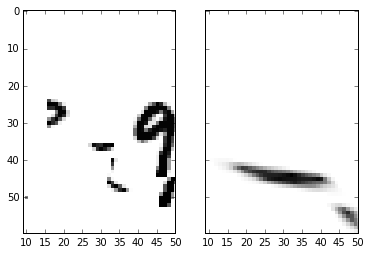

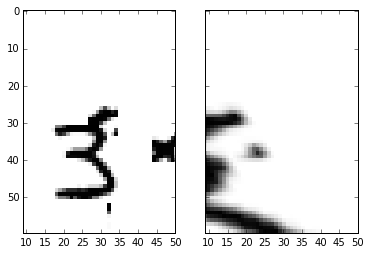

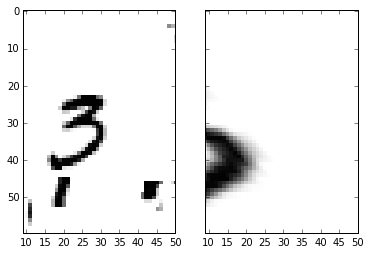

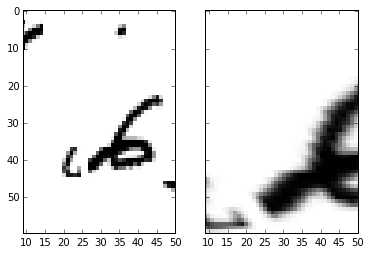

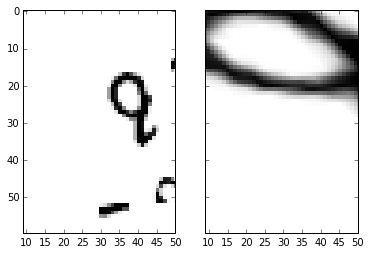

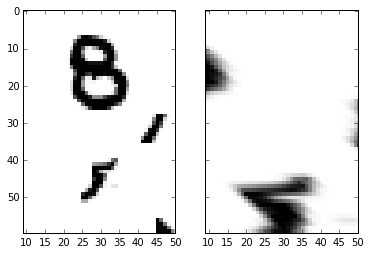

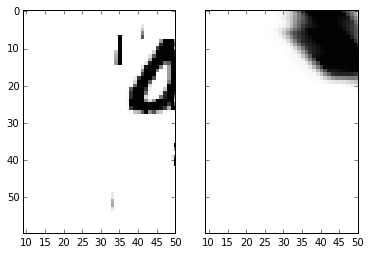

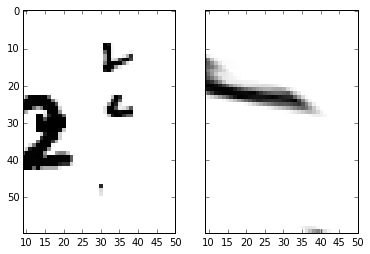

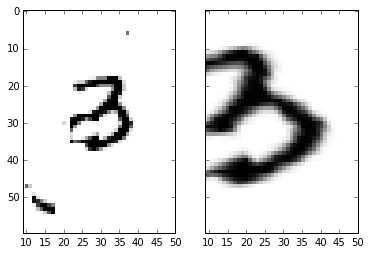

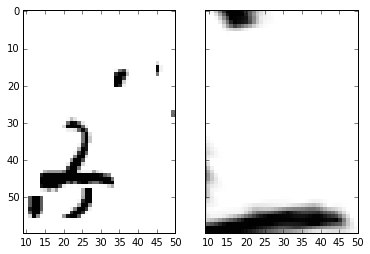

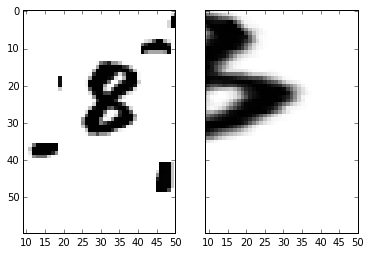

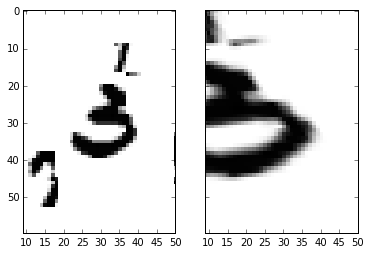

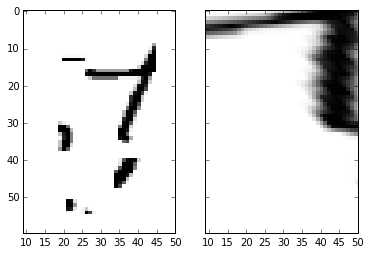

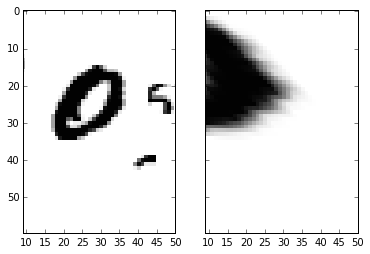

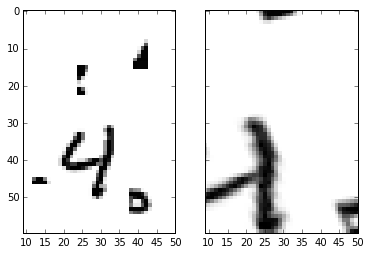

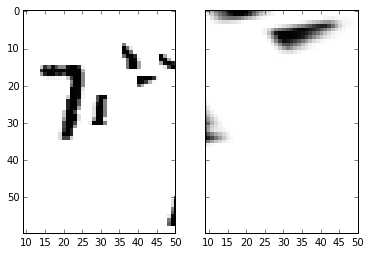

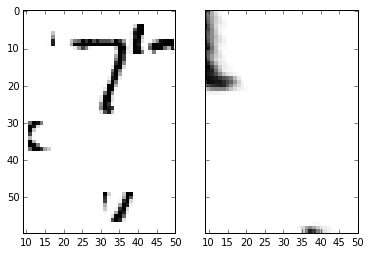

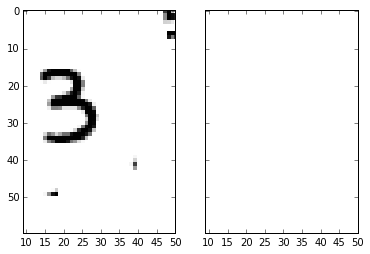

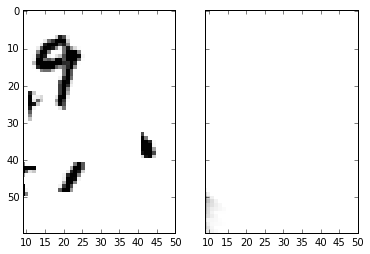

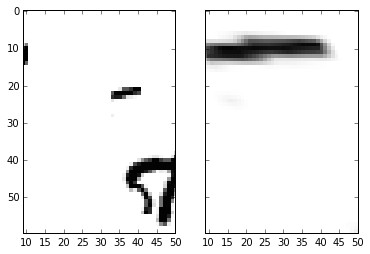

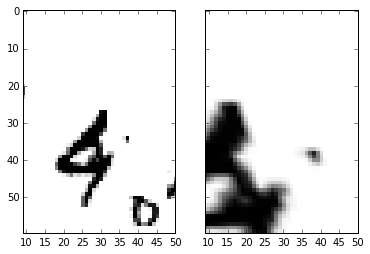

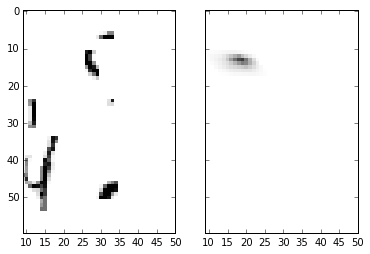

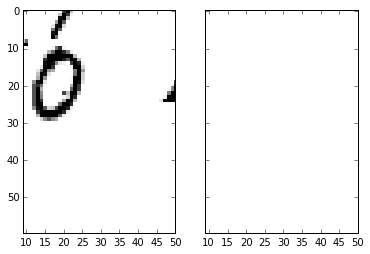

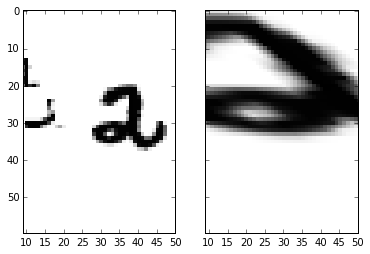

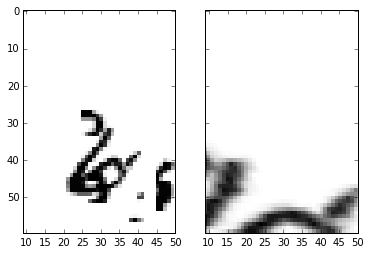

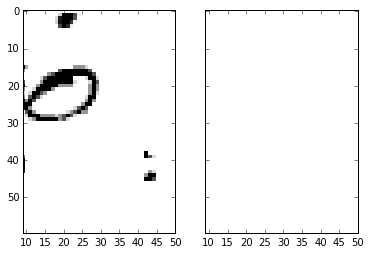

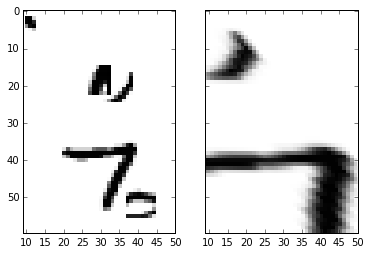

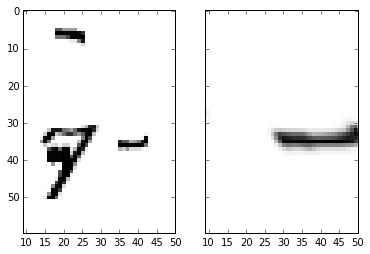

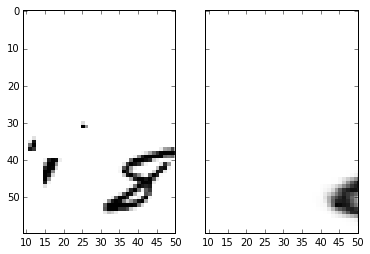

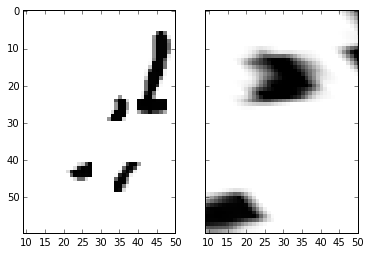

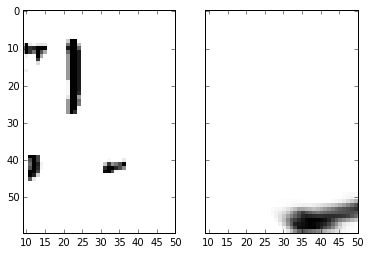

In [9]:
for idx in range(0, 100):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(Xt[idx:idx+1][0][0], interpolation='nearest', vmin=0, vmax=1, cmap='Greys')
    ax2.imshow(get_trans_out(Xt[idx:idx+1])[0][0], interpolation='nearest', vmin=0, vmax=1, cmap='Greys')
    f.savefig("transforms/%i.png" % idx)